In [31]:
import pandas as pd
import numpy as np

In [32]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from pandas import Timestamp
import warnings
warnings.filterwarnings("ignore")

Total Completed Projects: 137
Total Withdrawn Projects: 281


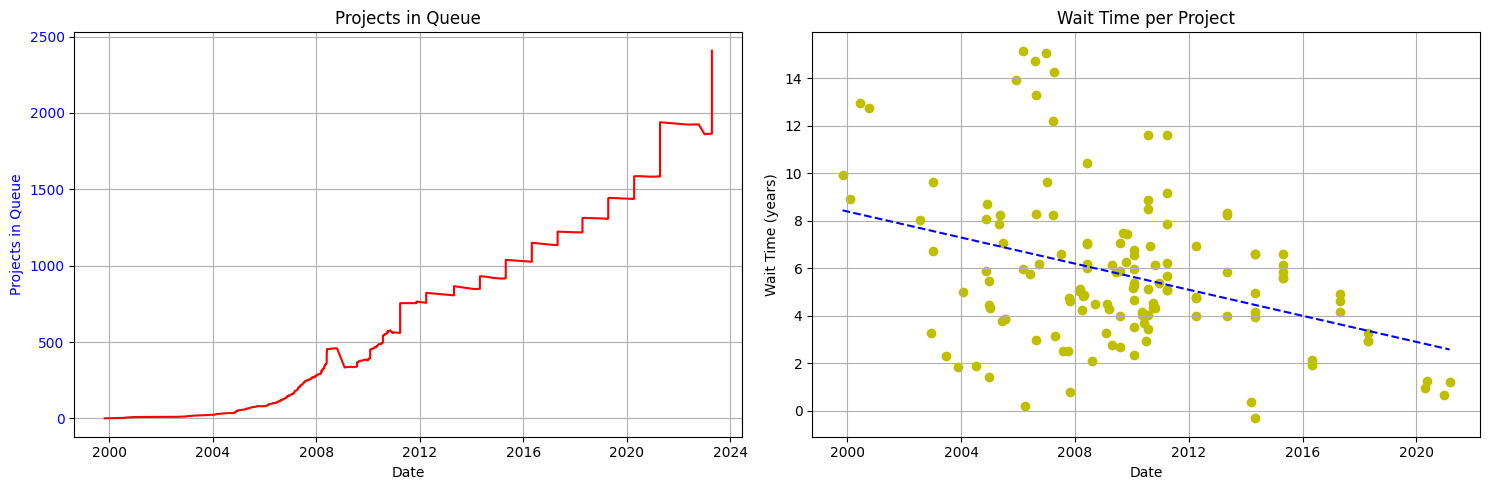

Total Completed Projects: 191
Total Withdrawn Projects: 45


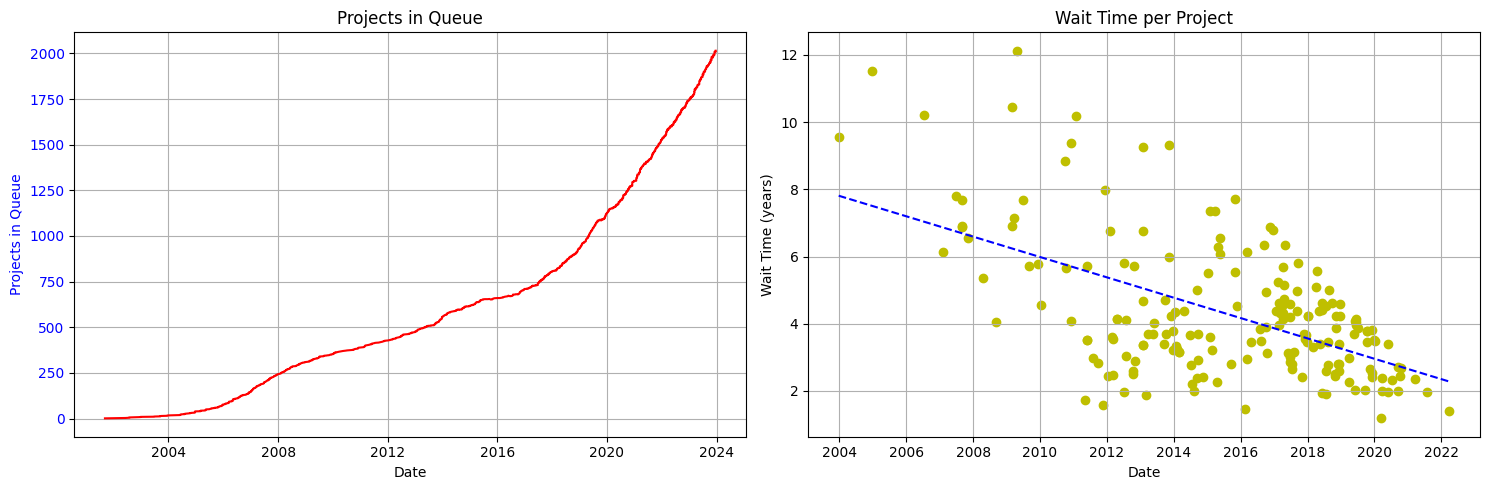

Total Completed Projects: 178
Total Withdrawn Projects: 92


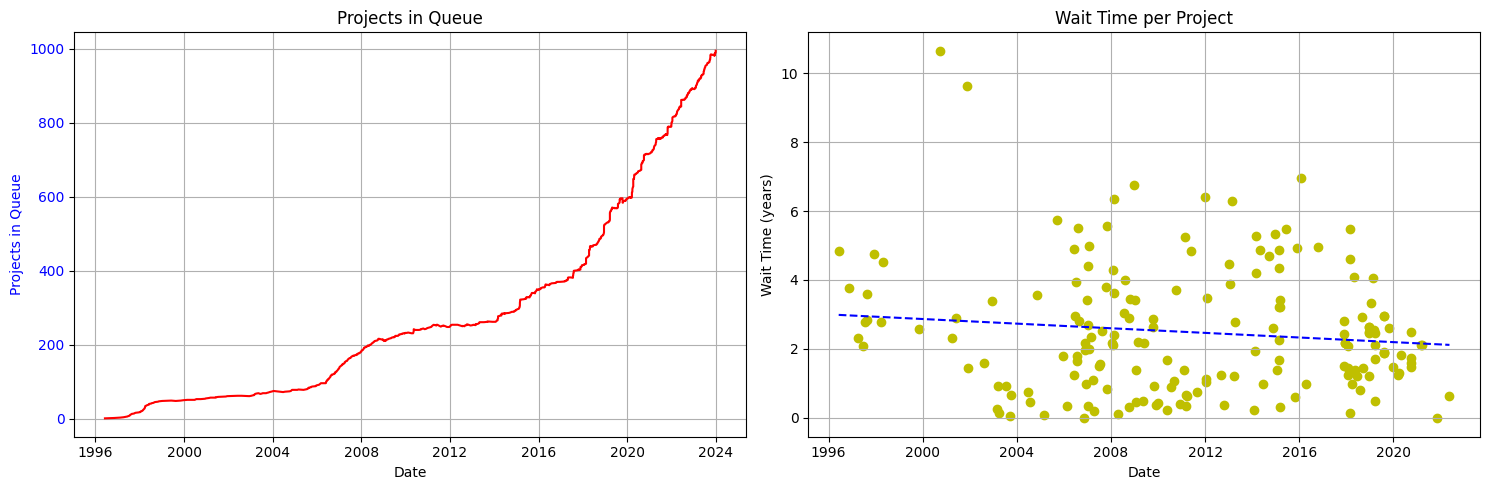

Total Completed Projects: 137
Total Withdrawn Projects: 0
R^2 Performance on seen data for Caiso :0.33364759991235604 

R^2 Performance on unseen data for Caiso :0.18482189733413812 

Total Completed Projects: 191
Total Withdrawn Projects: 0
R^2 Performance on seen data for Ercot :0.26942988904983955 

R^2 Performance on unseen data for Ercot :0.39966427243351865 

Total Completed Projects: 178
Total Withdrawn Projects: 0
R^2 Performance on seen data for NE :0.03650699565872928 

R^2 Performance on unseen data for NE :0.013469457290137932 

Total Completed Projects: 137
Total Withdrawn Projects: 0
R^2 Performance on seen data for Caiso :0.8493003660947206 

R^2 Performance on unseen data for Caiso :0.12169103403015125 

Total Completed Projects: 191
Total Withdrawn Projects: 0
R^2 Performance on seen data for Ercot :0.8724157152574383 

R^2 Performance on unseen data for Ercot :-0.2896758752811599 

Total Completed Projects: 178
Total Withdrawn Projects: 0
R^2 Performance on seen data 

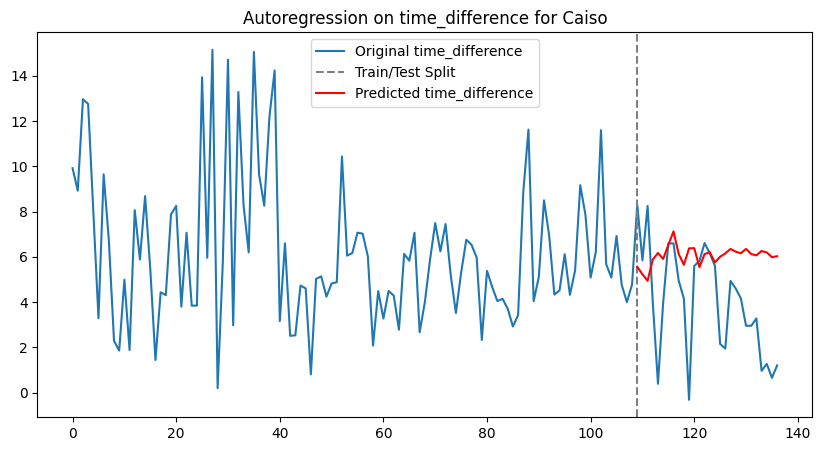

R² score for predicting time_difference: -1.8880


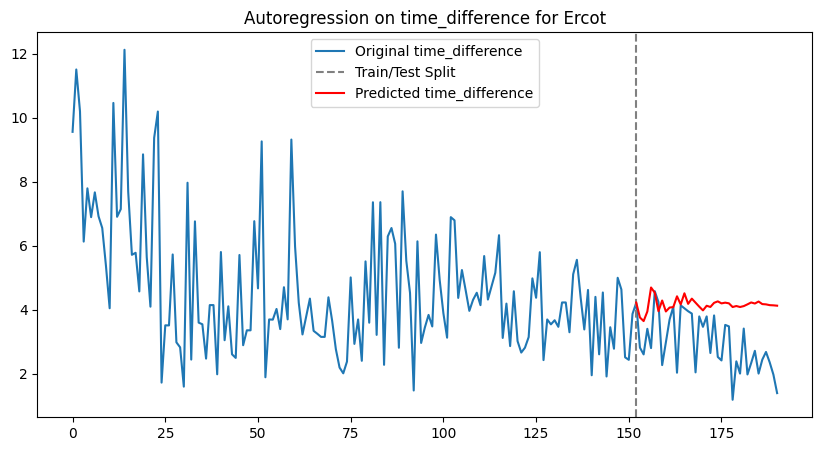

R² score for predicting time_difference: -0.2815


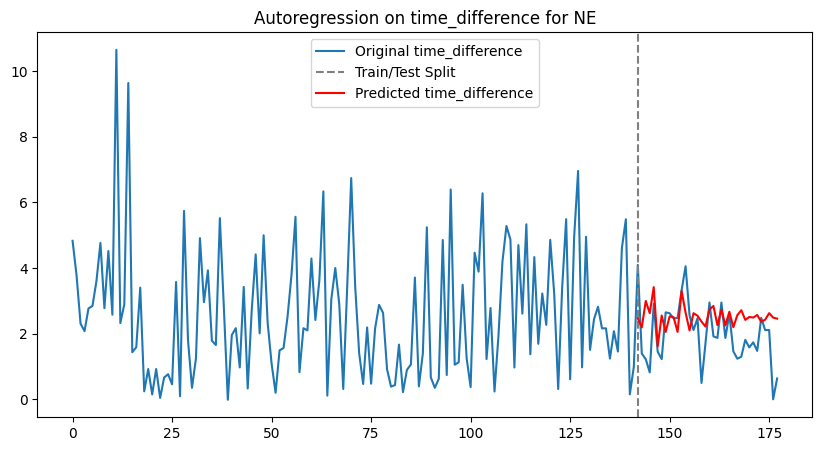

In [33]:
import nbformat
from nbconvert import PythonExporter
from IPython import get_ipython

# Load and execute the other notebook
with open("data_collection_working_version.ipynb", "r", encoding="utf-8") as f:
    notebook = nbformat.read(f, as_version=4)

python_exporter = PythonExporter()
code, _ = python_exporter.from_notebook_node(notebook)

# Execute the code from the other notebook
exec(code, globals())

# Now `sorted_pjm` should be available as a DataFrame


In [ ]:

# Get the webpage content
def find_date(iso,q_id):
    q_id=q_id.lower()
    url = f"https://www.interconnection.fyi/project/{iso}-{q_id}"  # Replace with your actual URL
    response = requests.get(url)

    # Parse the HTML
    soup = BeautifulSoup(response.content, "html.parser")

    # Navigate to the desired element
    # This example goes into the table, gets the 14th row, and the 2nd column
    table = soup.find("table")
    rows = table.find_all("tr")
    # for target_row in rows:
    if len(rows) >= 14:
        target_row = rows[13]  # Indexing starts at 0
        cells = target_row.find_all("td")
        if len(cells) >= 2:
            date_str=(cells[1].get_text(strip=True))
            date = datetime.strptime(date_str, "%B %d, %Y").date()
        else:
            print("Less than 2 cells in row 14")
    else:
        print("Less than 14 rows in table")

    return date

import requests
from bs4 import BeautifulSoup

# Get the webpage content
def find_info(iso,q_id,info_type):
    """Finds the status of a project given its ISO and queue ID, can be withdrawn active.
    acceptable info_type values are:
    'Power Market', 'Interconnection', 'Queue', 'Status'"""
    url = f"https://www.interconnection.fyi/project/{iso}-{q_id}"  # Replace with your actual URL
    response = requests.get(url)
    soupt = BeautifulSoup(response.content, "html.parser")
    # Navigate to the desired element
    table = soupt.find("table")
    rows = table.find_all("tr")
    # print(rows)
    for target_row in rows:
        print(target_row)
        cells = target_row.find_all("td")
        # print(cells)
        if info_type in cells[0].get_text(strip=True):
            return cells[1].get_text(strip=True).lower()
    return "unknown"  # Default return if status not found

# test
print(find_info("caiso","6","Withdrawn Date"))  #
# def find_date(iso,q_id):
#     q_id=q_id.lower()
#     url = f"https://www.interconnection.fyi/project/{iso}-{q_id}"  # Replace with your actual URL
#     response = requests.get(url)

#     # Parse the HTML
#     soup = BeautifulSoup(response.content, "html.parser")

#     # Navigate to the desired element
#     # This example goes into the table, gets the 14th row, and the 2nd column
#     table = soup.find("table")
#     rows = table.find_all("tr")
#     date_list = []
#     for target_row in rows:
#         cells = target_row.find_all("td")
#         if len(cells) >= 2:
#             date_str=(cells[1].get_text(strip=True))
#             try:
#                 date = datetime.strptime(date_str, "%B %d, %Y").date()
#                 date_list.append(date)
#             except Exception:
#                 continue

#     return max(date_list)


<tr class="css-0"><style data-emotion="css xumdn4">.css-xumdn4{text-align:start;-webkit-padding-start:var(--chakra-space-6);padding-inline-start:var(--chakra-space-6);-webkit-padding-end:var(--chakra-space-6);padding-inline-end:var(--chakra-space-6);padding-top:var(--chakra-space-4);padding-bottom:var(--chakra-space-4);line-height:var(--chakra-lineHeights-5);border-bottom:var(--chakra-borders-1px);border-color:var(--chakra-colors-gray-100);}.css-xumdn4[data-is-numeric=true]{text-align:end;}</style><td class="css-xumdn4">Queue ID</td><td class="css-xumdn4">6</td></tr>
<tr class="css-0"><td class="css-xumdn4">Status</td><td class="css-xumdn4">Withdrawn</td></tr>
<tr class="css-0"><td class="css-xumdn4">Power Market</td><td class="css-xumdn4"><div class="css-0">CAISO (<a class="mixpanel-link chakra-link no-underline" color="rgb(26, 32, 44)" href="/?market=CAISO" style="color:rgb(29,63,167);font-weight:700">all interconnection requests in the CAISO power market</a>)</div></td></tr>
<tr cla

In [36]:
print(find_date("pjm","B12_W02"))

AttributeError: 'NoneType' object has no attribute 'find_all'

In [39]:
count=0
for index, row in sorted_pjm.iterrows():
    count+=1
    if count%10==0:
        print(count)
    status = row["q_status"]
    if status == "operational":
        try:
            date = find_date("pjm", row["q_id"])
            sorted_pjm.loc[index, "on_date"] = date
        except Exception:
            continue

print(sorted_pjm.head())


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [40]:
print(sorted_pjm)

          q_id     q_status     q_date    ia_date    wd_date     on_date  \
19359      A05  operational 1997-04-01 2000-12-15        NaT  2002-06-01   
19243      A04  operational 1997-04-01        NaT        NaT  2006-05-01   
20245      A01  operational 1997-04-01        NaT        NaT  2002-04-01   
18651      A06    withdrawn 1997-04-01        NaT 2000-08-28         NaT   
20651      A03  operational 1997-04-01 2000-04-24        NaT  2000-06-01   
...        ...          ...        ...        ...        ...         ...   
24206  AJ1-023       active 2023-06-30        NaT        NaT         NaT   
18140  AJ1-022       active 2023-06-30        NaT        NaT         NaT   
24986  AJ1-021       active 2023-06-30        NaT        NaT         NaT   
19207  AJ1-020       active 2023-06-30        NaT        NaT         NaT   
18488  AJ1-037       active 2023-07-08        NaT        NaT         NaT   

      entity     project_name developer   utility  ... prop_date  \
19359    PJM       